In [243]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import optuna
import numpy as np

In [78]:
start_data = pd.read_csv("/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv")
start_data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [79]:
data = start_data.copy()

In [80]:
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [81]:
data["Gender"].replace({1: "Male", 0: "Female"}, inplace=True)
data["Diagnosis"].replace({1: "Positive", 0: "Negative"}, inplace=True)
data["Forgetfulness"].replace({1: "Yes", 0: "No"}, inplace=True)

/tmp/ipykernel_30/302927652.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Gender"].replace({1: "Male", 0: "Female"}, inplace=True)
/tmp/ipykernel_30/302927652.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [82]:
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,Female,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,No,Negative,XXXConfid
1,4752,89,Female,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,Yes,Negative,XXXConfid
2,4753,73,Female,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,No,Negative,XXXConfid
3,4754,74,Male,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,No,Negative,XXXConfid
4,4755,89,Female,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,No,Negative,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,Female,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,No,Positive,XXXConfid
2145,6896,75,Female,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,No,Positive,XXXConfid
2146,6897,77,Female,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,No,Positive,XXXConfid
2147,6898,78,Male,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,Yes,Positive,XXXConfid


In [83]:
data.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

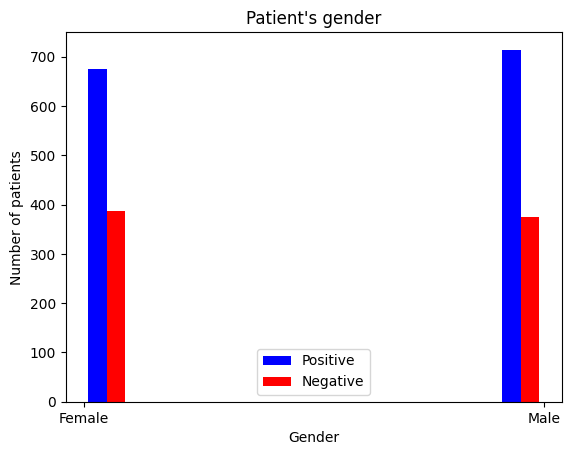

In [84]:
d_pos = data[data["Diagnosis"] == "Negative"]["Gender"]
d_neg = data[data["Diagnosis"] == "Positive"]["Gender"]

plt.title("Patient's gender")
plt.xlabel("Gender")
plt.ylabel("Number of patients")

plt.hist([d_pos, d_neg], color=["blue", "red"], label=["Positive", "Negative"])
plt.legend()
plt.show()

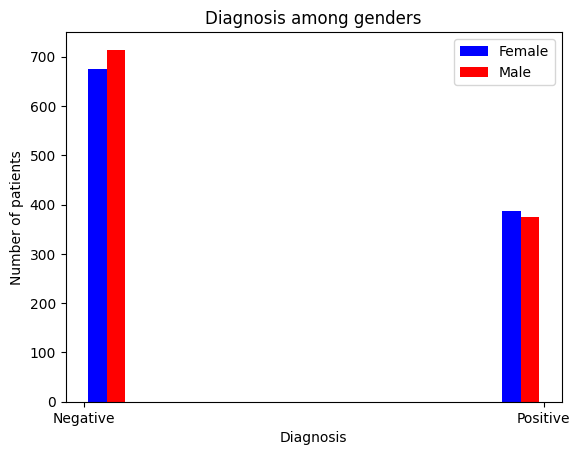

In [85]:
d_female = data[data["Gender"] == "Female"]["Diagnosis"]
d_male = data[data["Gender"] == "Male"]["Diagnosis"]

plt.title("Diagnosis among genders")
plt.xlabel("Diagnosis")
plt.ylabel("Number of patients")

plt.hist([d_female, d_male], color=["blue", "red"], label=["Female", "Male"])
plt.legend()
plt.show()

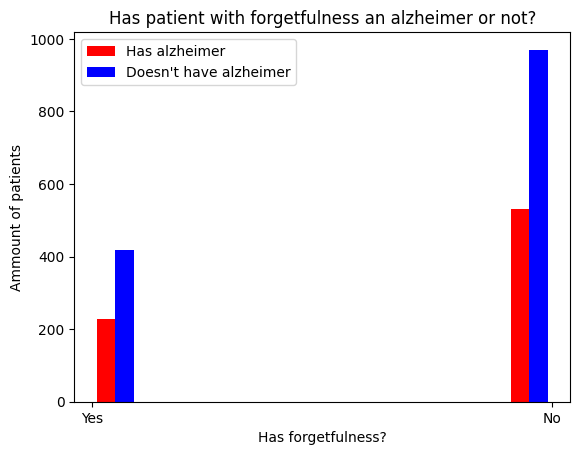

In [86]:
alz = data[data["Diagnosis"] == "Positive"]["Forgetfulness"]
non_alz = data[data["Diagnosis"] == "Negative"]["Forgetfulness"]

plt.title("Has patient with forgetfulness an alzheimer or not?")
plt.xlabel("Has forgetfulness?")
plt.ylabel("Ammount of patients")
plt.hist([alz, non_alz], color=["red", "blue"], label=["Has alzheimer", "Doesn't have alzheimer"])
plt.legend()

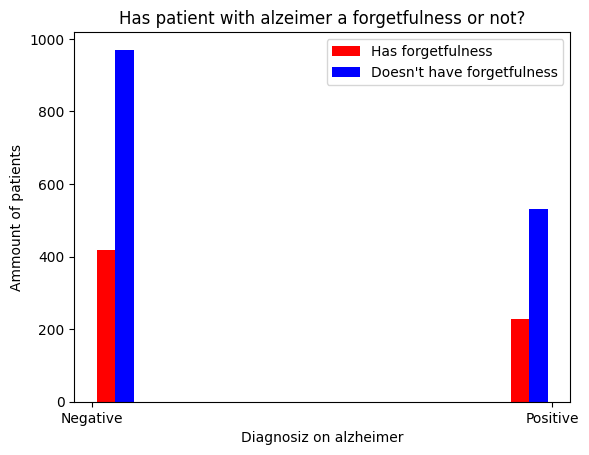

In [87]:
forg = data[data["Forgetfulness"] == "Yes"]["Diagnosis"]
non_forg = data[data["Forgetfulness"] == "No"]["Diagnosis"]

plt.title("Has patient with alzeimer a forgetfulness or not?")
plt.xlabel("Diagnosiz on alzheimer")
plt.ylabel("Ammount of patients")
plt.hist([forg, non_forg], color=["red", "blue"], label=["Has forgetfulness", "Doesn't have forgetfulness"])
plt.legend()

In [88]:
t_data = start_data.copy()
t_data = t_data.drop("DoctorInCharge", axis="columns")
corr = t_data.corr(method="pearson")
corr

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,1.000000,0.002947,-0.043665,-0.007608,-0.001729,-0.034228,0.021907,-0.020733,-0.011424,-0.018490,...,0.025033,0.005748,-0.033700,-0.019787,0.004430,0.010772,-0.011987,0.029727,0.001448,0.041019
Age,0.002947,1.000000,0.028708,0.027745,-0.060560,-0.015677,0.020060,0.007323,-0.010249,-0.023386,...,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
Gender,-0.043665,0.028708,1.000000,-0.003660,-0.007070,0.005928,0.016650,0.004330,-0.035795,0.010942,...,0.033324,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975
Ethnicity,-0.007608,0.027745,-0.003660,1.000000,0.026516,-0.003176,0.031485,0.008363,0.020498,-0.018184,...,-0.004704,0.003687,-0.019363,0.010475,0.022431,-0.018132,-0.030035,0.019363,-0.034619,-0.014782
EducationLevel,-0.001729,-0.060560,-0.007070,0.026516,1.000000,-0.023514,-0.009904,-0.012646,-0.016703,0.017412,...,0.020269,-0.000165,0.010473,0.031934,-0.008168,-0.017568,-0.019950,0.013033,-0.008685,-0.043966
BMI,-0.034228,-0.015677,0.005928,-0.003176,-0.023514,1.000000,0.020437,-0.008997,0.000742,0.019922,...,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.021907,0.020060,0.016650,0.031485,-0.009904,0.020437,1.000000,0.008363,0.010760,-0.002048,...,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,-0.020733,0.007323,0.004330,0.008363,-0.012646,-0.008997,0.008363,1.000000,0.021696,0.020117,...,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.011424,-0.010249,-0.035795,0.020498,-0.016703,0.000742,0.010760,0.021696,1.000000,0.011085,...,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.018490,-0.023386,0.010942,-0.018184,0.017412,0.019922,-0.002048,0.020117,0.011085,1.000000,...,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506


([<matplotlib.axis.YTick at 0x7b590ed5c040>,
 [Text(0, 0, 'PatientID'),
  Text(0, 1, 'Age'),
  Text(0, 2, 'Gender'),
  Text(0, 3, 'Ethnicity'),
  Text(0, 4, 'EducationLevel'),
  Text(0, 5, 'BMI'),
  Text(0, 6, 'Smoking'),
  Text(0, 7, 'AlcoholConsumption'),
  Text(0, 8, 'PhysicalActivity'),
  Text(0, 9, 'DietQuality'),
  Text(0, 10, 'SleepQuality'),
  Text(0, 11, 'FamilyHistoryAlzheimers'),
  Text(0, 12, 'CardiovascularDisease'),
  Text(0, 13, 'Diabetes'),
  Text(0, 14, 'Depression'),
  Text(0, 15, 'HeadInjury'),
  Text(0, 16, 'Hypertension'),
  Text(0, 17, 'SystolicBP'),
  Text(0, 18, 'DiastolicBP'),
  Text(0, 19, 'CholesterolTotal'),
  Text(0, 20, 'CholesterolLDL'),
  Text(0, 21, 'CholesterolHDL'),
  Text(0, 22, 'CholesterolTriglycerides'),
  Text(0, 23, 'MMSE'),
  Text(0, 24, 'FunctionalAssessment'),
  Text(0, 25, 'MemoryComplaints'),
  Text(0, 26, 'BehavioralProblems'),
  Text(0, 27, 'ADL'),
  Text(0, 28, 'Confusion'),
  Text(0, 29, 'Disorientation'),
  Text(0, 30, 'PersonalityChan

<Figure size 800x800 with 0 Axes>

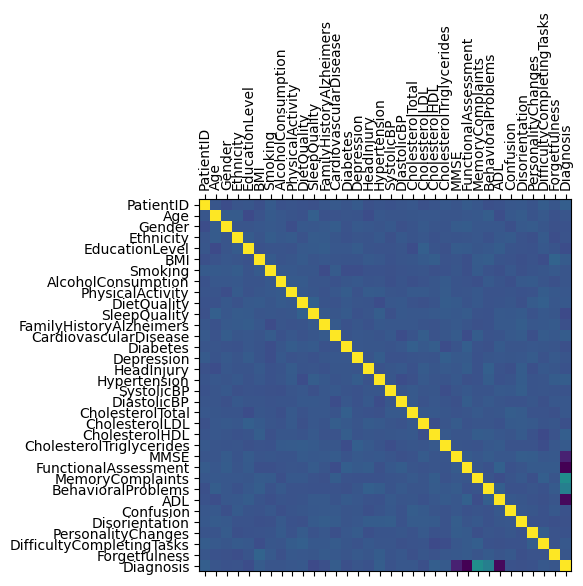

In [89]:
plt.figure(figsize=(8, 8))
plt.matshow(corr)

plt.xticks(range(len(t_data.columns)), t_data.columns, rotation=90)  
plt.yticks(range(len(t_data.columns)), t_data.columns)

In [90]:
t_data.columns

important_ones = ["MMSE", "FunctionalAssessment", "BehavioralProblems"]

In [91]:
data["MMSE"].head()

0    21.463532
1    20.613267
2     7.356249
3    13.991127
4    13.517609
Name: MMSE, dtype: float64

In [92]:
data["FunctionalAssessment"].head()

0    6.518877
1    7.118696
2    5.895077
3    8.965106
4    6.045039
Name: FunctionalAssessment, dtype: float64

In [93]:
# data["BehavioralProblems"].head()
data["BehavioralProblems"].unique()

array([0, 1])

In [94]:
data["BehavioralProblems"].replace({1: "Yes", 0: "No"}, inplace=True)


/tmp/ipykernel_30/1916399467.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["BehavioralProblems"].replace({1: "Yes", 0: "No"}, inplace=True)


In [95]:
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,Female,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,No,1.725883,0,0,0,1,No,Negative,XXXConfid
1,4752,89,Female,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,No,2.592424,0,0,0,0,Yes,Negative,XXXConfid
2,4753,73,Female,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,No,7.119548,0,1,0,1,No,Negative,XXXConfid
3,4754,74,Male,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,Yes,6.481226,0,0,0,0,No,Negative,XXXConfid
4,4755,89,Female,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,No,0.014691,0,0,1,1,No,Negative,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,Female,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,No,4.492838,1,0,0,0,No,Positive,XXXConfid
2145,6896,75,Female,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,Yes,9.204952,0,0,0,0,No,Positive,XXXConfid
2146,6897,77,Female,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,No,5.036334,0,0,0,0,No,Positive,XXXConfid
2147,6898,78,Male,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,No,3.785399,0,0,0,0,Yes,Positive,XXXConfid


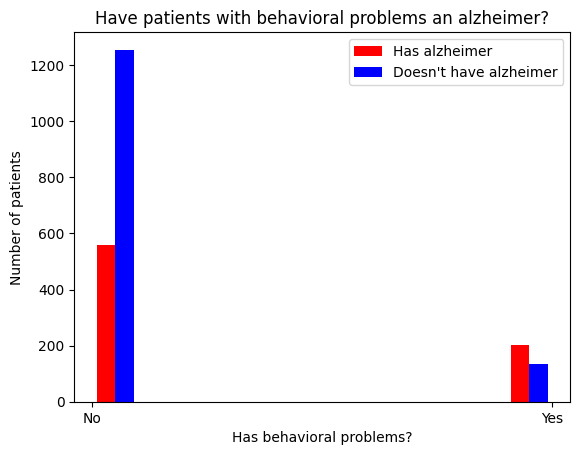

In [96]:
has_alz = data[data["Diagnosis"] == "Positive"]["BehavioralProblems"]
no_alz = data[data["Diagnosis"] == "Negative"]["BehavioralProblems"]

plt.title("Have patients with behavioral problems an alzheimer?")
plt.ylabel("Number of patients")
plt.xlabel("Has behavioral problems?")
plt.hist([has_alz, no_alz], color=["red", "blue"], label=["Has alzheimer", "Doesn't have alzheimer"])
plt.legend()

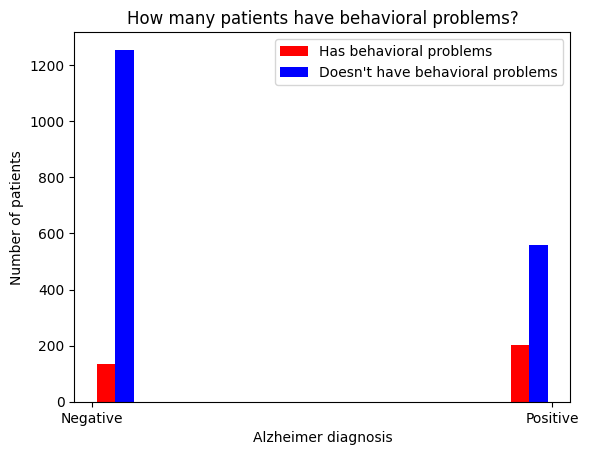

In [97]:
has_alz = data[data["BehavioralProblems"] == "Yes"]["Diagnosis"]
no_alz = data[data["BehavioralProblems"] == "No"]["Diagnosis"]

plt.title("How many patients have behavioral problems?")
plt.ylabel("Number of patients")
plt.xlabel("Alzheimer diagnosis")
plt.hist([has_alz, no_alz], color=["red", "blue"], label=["Has behavioral problems", "Doesn't have behavioral problems"])
plt.legend()

In [98]:
start_data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [99]:
start_data = start_data.drop("PatientID", axis="columns")
start_data.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [101]:
start_data

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [102]:
start_data["Ethnicity"].unique()

array([0, 3, 1, 2])

In [103]:
start_data.dtypes

Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
ADL                          float64
C

In [110]:
scaler = MinMaxScaler()
columns_to_scale = ["Age", "BMI", "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "MMSE", "FunctionalAssessment", "ADL"]
start_data[columns_to_scale] = scaler.fit_transform(start_data[columns_to_scale])
start_data

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,0.433333,0,0,2,0.316960,0,0.665183,0.633375,0.133931,0.837564,...,0,0,0.172486,0,0,0,1,0,0,XXXConfid
1,0.966667,0,0,0,0.473058,0,0.227170,0.762862,0.050995,0.525021,...,0,0,0.259154,0,0,0,0,1,0,XXXConfid
2,0.433333,0,3,1,0.111553,0,0.978276,0.785408,0.181896,0.945597,...,0,0,0.711936,0,1,0,1,0,0,XXXConfid
3,0.466667,1,0,1,0.752163,1,0.610751,0.843804,0.743443,0.731994,...,0,1,0.648094,0,0,0,0,0,0,XXXConfid
4,0.966667,0,0,0,0.228472,0,0.923204,0.631707,0.078698,0.265892,...,0,0,0.001341,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,0.033333,0,0,1,0.965137,0,0.078006,0.405291,0.655316,0.589092,...,0,0,0.449224,1,0,0,0,0,1,XXXConfid
2145,0.500000,0,0,2,0.114035,0,0.938860,0.135925,0.289848,0.759124,...,0,1,0.920508,0,0,0,0,0,1,XXXConfid
2146,0.566667,0,0,1,0.018717,0,0.229779,0.989841,0.811960,0.294609,...,0,0,0.503582,0,0,0,0,0,1,XXXConfid
2147,0.600000,1,3,1,0.011650,0,0.433901,0.636096,0.125543,0.720376,...,0,0,0.378469,0,0,0,0,1,1,XXXConfid


In [114]:
len(start_data[start_data["Diagnosis"] == 0]), len(start_data[start_data["Diagnosis"] == 1])

(1389, 760)

In [155]:
x = start_data.drop(["Diagnosis", "DoctorInCharge"], axis="columns")
y = start_data["Diagnosis"]
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    

In [194]:
def optimization(trial):
    
    x = start_data.drop(["Diagnosis", "DoctorInCharge", "PatientID"], axis="columns")
    y = start_data["Diagnosis"]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model_name = trial.suggest_categorical("model_name", ["RandomForest", "LogRegression", "SVC"])
    
    if model_name == "RandomForest":
    
    
        n_estimators = trial.suggest_int('n_estimators', 10, 100)
        max_depth = trial.suggest_int('max_depth', 1, 32)
        min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)


        clf = RandomForestClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            min_samples_split=min_samples_split
        )
        
        
        
    elif model_name == "LogRegression":
    
        penalty = trial.suggest_categorical("penalty", ["l2", "none"])
        solver = "lbfgs" if penalty != "l1" else "saga"
        max_iter = trial.suggest_int("max_iter", 30, 100)
        n_jobs = trial.suggest_int("n_jobs", 1, 4)
    
        clf = LogisticRegression(
            penalty = penalty,
            solver = solver,
            max_iter = max_iter,
            n_jobs = n_jobs
        )
        
        
    elif model_name == "SVC":
        
        C = trial.suggest_float("C", 1e-1, 10.0)
        kernel = trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
        probability = trial.suggest_categorical("probability", [True, False])
        
        
        clf = SVC(
            C = C,
            kernel = kernel,
            probability = probability    
        )
        
    
    clf.fit(x_train, y_train)
    

    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [176]:
study = optuna.create_study(direction='maximize')  
study.optimize(optimization, n_trials=50) 


[I 2024-10-08 08:52:22,797] A new study created in memory with name: no-name-6a5e8d14-7f28-46c3-a2d8-d5466388bf6e
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2024-10-08 08:52:23,830] Trial 0 finished with value: 0.6883720930232559 and parameters: {'model_name': 'LogRegression', 'penalty': 'none', '

In [195]:
print("Best trial:")
trial = study.best_trial
print(f"Accuracy: {trial.value}")
print(f"Best hyperparameters: {trial.params}")


Best trial:
Accuracy: 0.8604651162790697
Best hyperparameters: {'model_name': 'RandomForest', 'n_estimators': 100, 'max_depth': 28, 'min_samples_split': 0.10872308504083923}


In [178]:
trial.params["model_name"]

'RandomForest'

In [179]:
study.best_trial.params

{'model_name': 'RandomForest',
 'n_estimators': 100,
 'max_depth': 28,
 'min_samples_split': 0.10872308504083923}

In [255]:
best_params = study.best_trial.params

best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'], 
    min_samples_split=best_params['min_samples_split'] 
)


best_model.fit(x_train, y_train)
test_accuracy = best_model.score(x_test, y_test)
print(f"Accuracy of the best model on the test set: {test_accuracy:.2f}")


Accuracy of the best model on the test set: 0.85


In [256]:
y_preds = best_model.predict(x_test)

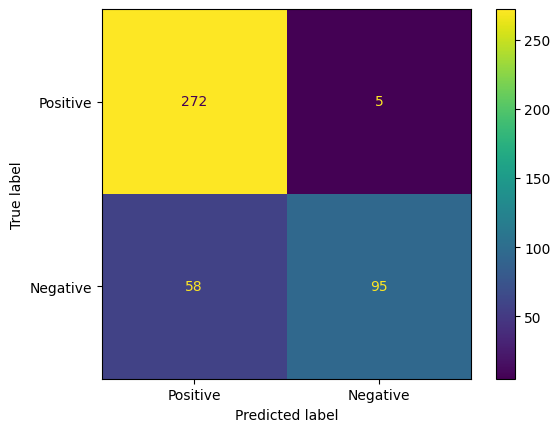

In [257]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds, display_labels = ["Positive", "Negative"])

In [197]:
start_data = pd.read_csv("/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv")
start_data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [198]:
x = start_data.drop(["Diagnosis", "DoctorInCharge", "PatientID"], axis="columns")
y = start_data["Diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('classifier', RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'], 
    min_samples_split=best_params['min_samples_split'] 
    ))  
])


pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [248]:
test_data = [87, 1, 2, 1, 27.32332, 0, 12.3233, 0.221, 5.932, 7.2342, 
             0, 0, 1, 0, 0, 0, 123, 71, 282.242, 56.543, 32.343, 132.4343, 21.232, 
             6.4234, 0, 0, 1.32, 0, 0, 0, 1, 0]

test_data = np.array([test_data])
len(test_data)

1

In [253]:
diagnosis = ["No", "Yes"]
res = pipeline.predict(test_data)
print(diagnosis[int(res)])

No


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/tmp/ipykernel_30/294499239.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(diagnosis[int(res)])
